# Externality Estimation Equation: Summer 2022

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [47]:
from matplotlib.ticker import FormatStrFormatter

In [4]:
t = np.arange(0,100, 0.5)

### I. Environmental Impact Function 

In [5]:
def e_equation(alpha, beta, decay, interest, time):
    relative_Damage = np.exp(-t*(beta+decay+interest))*(((np.exp(1)*(beta+decay+interest)*t)/(alpha-1))**(alpha-1))
    return relative_Damage

In [6]:
with_Discounting = e_equation(2, 0.2, 0.02, 0.05, t)

In [7]:
#np.interp(0.5, t, with_Discounting)

In [8]:
control_function = e_equation(2, 0.2, 0, 0, t)

Text(0, 0.5, 'Relative Impact')

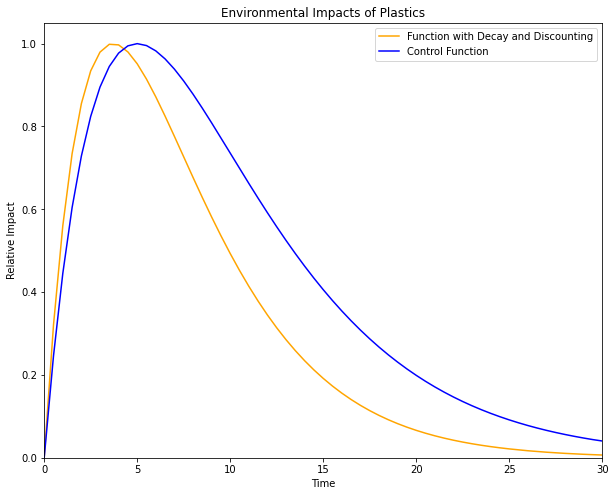

In [9]:
plt.figure(figsize=(10,8))
plt.plot(t, with_Discounting, color = "orange", label = "Function with Decay and Discounting")
plt.plot(t, control_function, color = "blue", label = "Control Function")
plt.plot()
plt.title("Environmental Impacts of Plastics")
plt.ylim()
plt.xlim(0, 30)
plt.ylim(ymin=0) 
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Relative Impact")

### II. Cumulative Damage Graph 

In [10]:
def cumilative_damage(function):
    total, result = 0, []
    for ele in function:
        result.append(total)
        total += ele/2
    return result

In [11]:
total_Damage_with_Discounting = cumilative_damage(with_Discounting)

In [12]:
total_Damage_Control = cumilative_damage(control_function)

In [13]:
max(total_Damage_with_Discounting)

10.052434063093234

Text(0, 0.5, 'Externality Damage ($)')

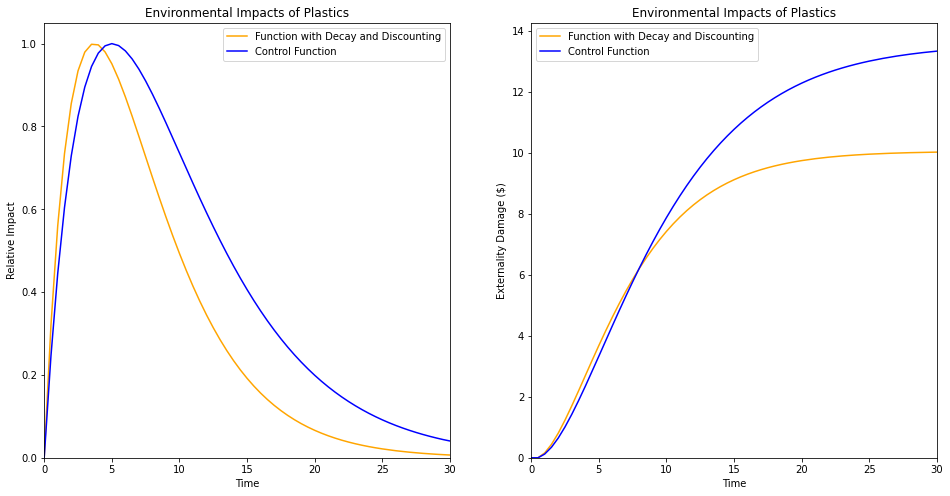

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(t, with_Discounting, color = "orange", label = "Function with Decay and Discounting")
plt.plot(t, control_function, color = "blue", label = "Control Function")
plt.plot()
plt.title("Environmental Impacts of Plastics")
plt.ylim()
plt.xlim(0, 30)
plt.ylim(ymin=0) 
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Relative Impact")

plt.subplot(122)
plt.plot(t, total_Damage_with_Discounting, color = "orange", label = "Function with Decay and Discounting")
plt.plot(t, total_Damage_Control, color = "blue", label = "Control Function")
plt.plot()
plt.title("Environmental Impacts of Plastics")
plt.ylim()
plt.xlim(0, 30)
plt.ylim(ymin=0) 
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Externality Damage ($)")

### III. Applying Data

In [15]:
#Emissions_per_gram = 10
Emissions_per_gram = 5
GHG_MT_Value = 75
initial_Amount = 6
alpha = 2
beta = 0.1
decay = .01
interest = 0.05
time = t

### ~ Varying Price of Carbon ~

#### IV. Low-end: $5 per metric ton of CO2 

In [16]:
def e_equation_data(alpha, beta, interest, decay, t, GHG_MT_Value, initial_Amount):
    c = beta + decay + interest 
    #Emissions_per_gram = 0.002955892
    Cost_per_gram = (GHG_MT_Value*Emissions_per_gram)/1000000
    relative_Damage = Cost_per_gram * initial_Amount * (np.exp(-t*(beta+decay+interest))*(((np.exp(1)*(beta+decay+interest)*t)/(alpha-1))**(alpha-1)))
    return relative_Damage

In [17]:
spoon_damage_function_low = e_equation_data(alpha, beta, interest, decay, time, 15, initial_Amount)

In [18]:
total_Damage_spoon_low = cumilative_damage(spoon_damage_function_low)

#### V. $50 per metric ton of CO2

In [19]:
spoon_damage_function_med = e_equation_data(alpha, beta, interest, decay, time, 75, initial_Amount)

In [20]:
total_Damage_spoon_med = cumilative_damage(spoon_damage_function_med)

#### VI. $150 per metric ton of CO2

In [21]:
spoon_damage_function_high = e_equation_data(alpha, beta, interest, decay, time, 150, initial_Amount)

In [22]:
total_Damage_spoon_high = cumilative_damage(spoon_damage_function_high)

#### VII. Combined 

[]

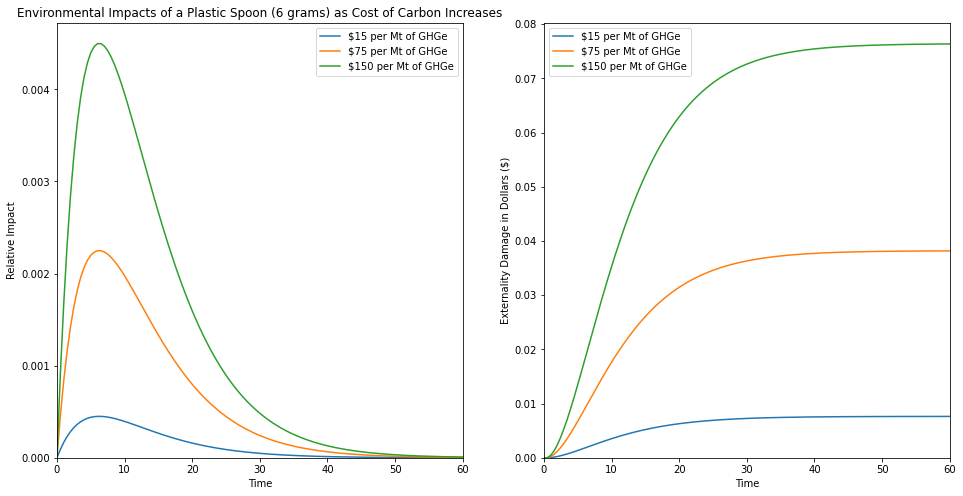

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Environmental Impacts of a Plastic Spoon (6 grams) as Cost of Carbon Increases", loc= 'center')
plt.plot(t, spoon_damage_function_low, label = "$15 per Mt of GHGe")
plt.plot(t, spoon_damage_function_med, label = "$75 per Mt of GHGe")
plt.plot(t, spoon_damage_function_high, label = "$150 per Mt of GHGe")
plt.plot()
plt.ylim()
plt.ylim(ymin=0) 
plt.xlim(0, 60)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Relative Impact")

plt.subplot(122)
plt.plot(t, total_Damage_spoon_low, label = "$15 per Mt of GHGe")
plt.plot(t, total_Damage_spoon_med, label = "$75 per Mt of GHGe")
plt.plot(t, total_Damage_spoon_high, label = "$150 per Mt of GHGe")
plt.ylim()
plt.ylim(ymin=0) 
plt.xlim(0, 60)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Externality Damage in Dollars ($)")
plt.plot()

In [24]:
max(total_Damage_spoon_low)

0.007641075153778058

In [25]:
max(total_Damage_spoon_med)

0.038205375768890285

In [26]:
max(total_Damage_spoon_high)

0.07641075153778057

### ~ Varying Decay Rate ~

### Decay = 10

In [27]:
spoon_damage_function_fastest_decay = e_equation_data(alpha, beta, interest, 10, time, 75, initial_Amount)

In [28]:
total_Damage_spoon_fastest_decay = cumilative_damage(spoon_damage_function_fastest_decay)

In [29]:
max(total_Damage_spoon_fastest_decay)

9.823929147023969e-05

### Decay = 1

In [30]:
spoon_damage_function_fast_decay = e_equation_data(alpha, beta, interest, 1, time, 75, initial_Amount)

In [31]:
total_Damage_spoon_fast_decay = cumilative_damage(spoon_damage_function_fast_decay)

In [32]:
max(total_Damage_spoon_fast_decay)

0.005174236056411523

### Decay  = 0.1

In [33]:
spoon_damage_function_med_decay = e_equation_data(alpha, beta, interest, 0.1, time, 75, initial_Amount)

In [34]:
total_Damage_spoon_med_decay = cumilative_damage(spoon_damage_function_med_decay)

In [35]:
max(total_Damage_spoon_med_decay)

0.0244327064515729

### Decay = 0.01

In [36]:
spoon_damage_function_slow_decay = e_equation_data(alpha, beta, interest, 0.01, time, 75, initial_Amount)

In [37]:
total_Damage_spoon_slow_decay = cumilative_damage(spoon_damage_function_slow_decay)

In [38]:
max(total_Damage_spoon_slow_decay)

0.038205375768890285

### Decay = 0.0001

In [39]:
spoon_damage_function_slowest_decay = e_equation_data(alpha, beta, interest, 0.0001, time, 75, initial_Amount)

In [40]:
total_Damage_spoon_slowest_decay = cumilative_damage(spoon_damage_function_slowest_decay)

In [41]:
max(total_Damage_spoon_slowest_decay)

0.04072772292725511

[]

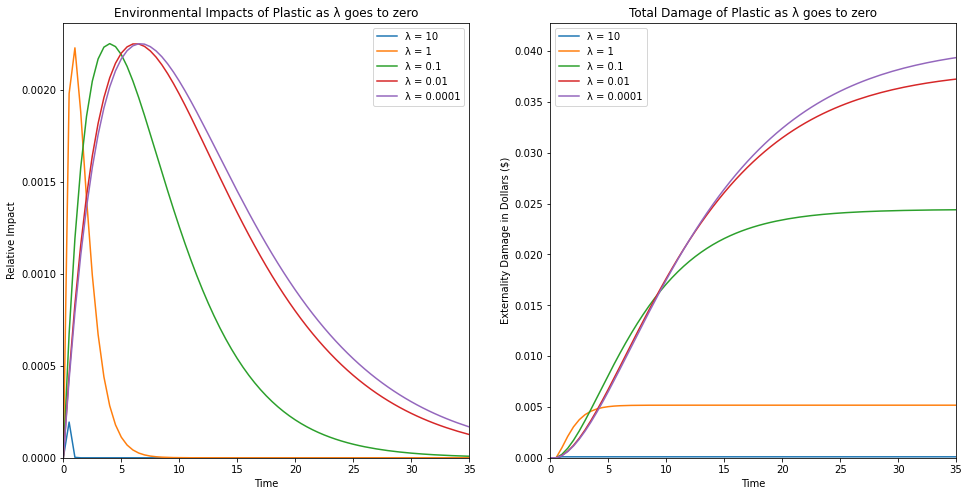

In [42]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(t, spoon_damage_function_fastest_decay, label = "\u03BB = 10")
plt.plot(t, spoon_damage_function_fast_decay, label = "\u03BB = 1")
plt.plot(t, spoon_damage_function_med_decay, label = "\u03BB = 0.1")
plt.plot(t, spoon_damage_function_slow_decay, label = "\u03BB = 0.01")
plt.plot(t, spoon_damage_function_slowest_decay, label = "\u03BB = 0.0001")
plt.plot()
plt.title("Environmental Impacts of Plastic as \u03BB goes to zero")
plt.ylim()
plt.ylim(ymin=0) 
plt.xlim(0, 35)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Relative Impact")

plt.subplot(122)
plt.plot(t, total_Damage_spoon_fastest_decay, label = "\u03BB = 10")
plt.plot(t, total_Damage_spoon_fast_decay, label = "\u03BB = 1")
plt.plot(t, total_Damage_spoon_med_decay, label = "\u03BB = 0.1")
plt.plot(t, total_Damage_spoon_slow_decay, label = "\u03BB = 0.01")
plt.plot(t, total_Damage_spoon_slowest_decay, label = "\u03BB = 0.0001")
plt.title("Total Damage of Plastic as \u03BB goes to zero")
plt.ylim()
plt.ylim(ymin=0) 
plt.xlim(0, 35)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Externality Damage in Dollars ($)")
plt.plot()

~~

# IV. Interactive Graph 

In [46]:
alpha = widgets.IntSlider(description = 'alpha', value = 2, min = -10, max = 10)
beta = widgets.FloatLogSlider(value=0.1, base=10, min=-10, max=10, step=0.2, description='Beta')
interest = widgets.FloatSlider(description = 'interest',value = 0.05, min = 0,  max = 1, readout_format='.2f') 
decay = widgets.FloatLogSlider(value=0.001, base=10, min=-10, max=10, step=0.2, description='Decay')
GHG_MT_Value = widgets.IntSlider(description = 'GHG_MT_Value',value = 50, max =500, min = 0, step = 5) 
initial_Amount = widgets.FloatSlider(description = 'initial_Amount',value = 5, min = 0, max = 1000)  
Emissions_per_gram = widgets.FloatSlider(description = 'Emissions_per_gram', value = 6, min = 0, max =1000000)          


def e_equation_data(alpha, beta, interest, decay, GHG_MT_Value, initial_Amount, Emissions_per_gram):
    t = np.arange(0,100, 0.5)
    c = beta + decay + interest 
    Cost_per_gram = (GHG_MT_Value*Emissions_per_gram)/1000000
    relative_Damage = Cost_per_gram * initial_Amount * (np.exp(-t*(beta+decay+interest))*(((np.exp(1)*(beta+decay+interest)*t)/(alpha-1))**(alpha-1)))
    
    plt.figure(2)
    plt.plot(t, relative_Damage, label = "\u03BB = 2")
    plt.ylim()
    plt.ylim(ymin=0) 
    plt.xlim(0, 100)
    plt.ylabel("Relative Impact")
    plt.plot()
    
def cumulative_damage(alpha, beta, interest, decay, GHG_MT_Value, initial_Amount, Emissions_per_gram):
    t = np.arange(0,100, 0.5)
    c = beta + decay + interest 
    Cost_per_gram = (GHG_MT_Value*Emissions_per_gram)/1000000
    relative_Damage = Cost_per_gram * initial_Amount * (np.exp(-t*(beta+decay+interest))*(((np.exp(1)*(beta+decay+interest)*t)/(alpha-1))**(alpha-1)))
    
    total, externality = 0, []
    for ele in relative_Damage:
        externality.append(total)
        total += ele/2


    plt.figure(2)
    plt.plot(t, externality)
    plt.ylim()
    plt.ylim(ymin=0) 
    plt.xlim(0, 100)
    plt.ylabel("Externality ($)")
    plt.plot()
    
out1 = widgets.interactive_output(e_equation_data, {'alpha': alpha, 'beta': beta, 'interest': interest, 'decay': decay, 'GHG_MT_Value': GHG_MT_Value, 'initial_Amount': initial_Amount, 'Emissions_per_gram': Emissions_per_gram})
out2 = widgets.interactive_output(cumulative_damage, {'alpha': alpha, 'beta': beta, 'interest': interest, 'decay': decay, 'GHG_MT_Value': GHG_MT_Value, 'initial_Amount': initial_Amount, 'Emissions_per_gram': Emissions_per_gram})

display(alpha)
display(beta)
display(interest)
display(decay)
display(GHG_MT_Value)
display(initial_Amount)
display(Emissions_per_gram)


display(out1)
display(out2)

IntSlider(value=2, description='alpha', max=10, min=-10)

FloatLogSlider(value=0.1, description='Beta', max=10.0, min=-10.0, step=0.2)

FloatSlider(value=0.05, description='interest', max=1.0)

FloatLogSlider(value=0.001, description='Decay', max=10.0, min=-10.0, step=0.2)

IntSlider(value=50, description='GHG_MT_Value', max=500, step=5)

FloatSlider(value=5.0, description='initial_Amount', max=1000.0)

FloatSlider(value=6.0, description='Emissions_per_gram', max=1000000.0)

Output()

Output()

In [47]:
def emissions_per_gram(Mj):
    emissions_p_g = (Mj/1000) * 62.209
    
    # 1 Mj = 62.209 emissions (using Mjs found in 1 barrel of oil)
    
    # emissions_p_g = 62.209 * perMj
    
    return (emissions_p_g)

In [50]:
# MJ / Kg

# PET (Bottle Grade): 82.71 (5.1) 
# PET (California): 119.6 (7.4) 

# HDPE: 77.75 (4.8) 

# LDPE: 80.4 (5) 

# E-PVC: 66.7 (4.1) 
# S-PVC: 56.7 (3.5)

# PP: 75.5 (4.7) 

# E-PS: 85.59 (5.2) 


#Nickel [Ni]: 147 (9.1) 

#Copper [Cu]: 53.7 (3.3) 

#Gold [Au]: 208,000 (12939) 

#Aluminum [Al]: 131 (8.1)

#PLA (corn-based plastic) (Bohlmann): 56.7 (3.5) 
#PLA: (Ghomi):  30.1 (1.9) 
#PLA: (Vink): 54 (3.4)   




In [44]:
def cumulative_damage(alpha, beta, interest, decay, GHG_MT_Value, initial_Amount, Emissions_per_gram):
    t = np.arange(0,100, 0.5)
    c = beta + decay + interest 
    Cost_per_gram = (GHG_MT_Value*Emissions_per_gram)/1000000
    relative_Damage = Cost_per_gram * initial_Amount * (np.exp(-t*(beta+decay+interest))*(((np.exp(1)*(beta+decay+interest)*t)/(alpha-1))**(alpha-1)))
    
    total, externality = 0, []
    for ele in relative_Damage:
        externality.append(total)
        total += ele/2
    x= max(externality)
    return round(x, 2) 

In [45]:
cumulative_damage(alpha, beta, interest, 0.01, 75, 6, 5)

0.04